In [76]:
#Import The Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score

Data Collection and Processing


In [77]:
#loading the data from csv file to pandas dataframe
#car_detaset=pd.read_csv("content/CAR DETAILS FROM CAR DEKHO.csv")
#car_dataset=pd.read_csv("content/car data.csv")
#car_dataset=pd.read_csv("car data modified.csv")
car_dataset=pd.read_csv("MODIFIED-CAR-DETAILS-FROM-CAR-DEKHO.csv")

In [78]:
#imspecting the first 8 rows of the dataframe, here car_dataset is our dataframe
car_dataset.head()  #8 collum ie 8 features


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,NaN,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,NaN,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [79]:
#checking the number of rows and columns, ie the number of data points
car_dataset.shape 
#8 collum 4340 rows!

(4340, 8)

In [80]:
#getting some information about this data set
car_dataset.info()  
#object are caterogical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4322 non-null   float64
 2   selling_price  4336 non-null   float64
 3   km_driven      4317 non-null   float64
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(3), object(5)
memory usage: 271.4+ KB


In [81]:
car_dataset.isnull() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,True,False,False,False,False


In [82]:
#checking the nmber of missing values
#no missing values here
car_dataset.isnull().sum()

name              0
year             18
selling_price     4
km_driven        23
fuel              0
seller_type       0
transmission      0
owner             0
dtype: int64

In [83]:
# How many columns have NaN values?

nan_attr = 0
for e in car_dataset.isnull().sum():
  if e>0:
    nan_attr += 1

print(nan_attr)

3


#missing value 
#Year -18
#selling price -4
#kms driven -23

In [84]:
#checkign the distrubution of categorical data
#how many cars are petrol dese, dealaer, manual or automatic
#print(car_dataset.Fuel_Type.value_counts()) #this will give the values 
#print(car_dataset.Seller_Type.value_counts())
#print(car_dataset.Transmission.value_counts())

In [85]:
#car_dataset.columns        #shows collum labels     

#making list
#list(car_dataset.columns)

In [86]:
#feeling up data                                                                            #####################
from sklearn.impute import SimpleImputer
import numpy as np

# # The imputation strategy:  mean, median, most_frequent, constant
# #                       
# impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #can also be mean, median, most_frequent, constant

# impute.fit(car_dataset[['year']])
# #impute.fit(car_dataset[['Selling_Price']])

# car_dataset['year'] = impute.transform(car_dataset[['year']])
# # feature dataset0['native-country'] 
# # data frame impute.transform(dataset0[['native-country']])
# car_dataset.isnull().sum()
#year is zero now

In [87]:
#feeling up data                                                                                      
# from sklearn.impute import SimpleImputer
# import numpy as np

# # The imputation strategy:  mean, median, most_frequent, constant
# #                       
# impute = SimpleImputer(missing_values=np.nan, strategy='mean') #can also be mean, median, most_frequent, constant

# impute.fit(car_dataset[['selling_price']])
# #impute.fit(car_dataset[['Selling_Price']])

# car_dataset['selling_price'] = impute.transform(car_dataset[['selling_price']])
# # feature dataset0['native-country'] 
# # data frame impute.transform(dataset0[['native-country']])
# car_dataset.isnull().sum()
# #Present_Price is zero now

In [88]:
#feeling up data                                                                                        ##########################
# from sklearn.impute import SimpleImputer
# import numpy as np

# # The imputation strategy:  mean, median, most_frequent, constant
# #                       
# impute = SimpleImputer(missing_values=np.nan, strategy='median') #can also be mean, median, most_frequent, constant

# impute.fit(car_dataset[['km_driven']])
# #impute.fit(car_dataset[['Selling_Price']])

# car_dataset['km_driven'] = impute.transform(car_dataset[['km_driven']])
# # feature dataset0['native-country'] 
# # data frame impute.transform(dataset0[['native-country']])
# car_dataset.isnull().sum()
# #Present_Price is zero now

In [89]:
car_dataset.isnull().sum()

name              0
year             18
selling_price     4
km_driven        23
fuel              0
seller_type       0
transmission      0
owner             0
dtype: int64

In [90]:
# #Drop row
car_dataset["year"]= car_dataset["year"].replace({"completed":"complete"})
car_dataset=car_dataset[car_dataset["year"].notnull()]
car_dataset=car_dataset[car_dataset["selling_price"].notnull()]
car_dataset=car_dataset[car_dataset["km_driven"].notnull()]
#nursery_df["Form of the family"]= nursery_df["Form of the family"].replace({"completed":"complete"})
# nursery_df=nursery_df[nursery_df["Form of the family"].notnull()]

In [91]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [92]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

Diesel      2127
Petrol      2104
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3208
Dealer               987
Trustmark Dealer     100
Name: seller_type, dtype: int64
Manual       3851
Automatic     444
Name: transmission, dtype: int64
First Owner             2799
Second Owner            1095
Third Owner              303
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


**Label** encoding the categorical features

In [93]:
# encoding "fuel" Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)

# encoding "seller_type" Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1, 'Trustmark Dealer':2}},inplace=True)

# encoding "transmission" Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding "owner" Column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}},inplace=True)

In [94]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000.0,70000.0,0,1,0,0
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,1,1,0,0
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,0,1,0,0
5,Maruti Alto LX BSIII,2007.0,140000.0,125000.0,0,1,0,0
6,Hyundai Xcent 1.2 Kappa S,2016.0,550000.0,25000.0,0,1,0,0


Splitting the dataset into features and target

In [95]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [96]:
print(X)

        year  km_driven  fuel  seller_type  transmission  owner
0     2007.0    70000.0     0            1             0      0
2     2012.0   100000.0     1            1             0      0
3     2017.0    46000.0     0            1             0      0
5     2007.0   125000.0     0            1             0      0
6     2016.0    25000.0     0            1             0      0
...      ...        ...   ...          ...           ...    ...
4334  2012.0   170000.0     1            1             0      0
4335  2014.0    80000.0     1            1             0      1
4336  2014.0    80000.0     1            1             0      1
4337  2009.0    83000.0     0            1             0      1
4339  2016.0    40000.0     0            1             0      0

[4295 rows x 6 columns]


In [97]:
print(Y)

0        60000.0
2       600000.0
3       250000.0
5       140000.0
6       550000.0
          ...   
4334    600000.0
4335    409999.0
4336    409999.0
4337    110000.0
4339    225000.0
Name: selling_price, Length: 4295, dtype: float64


# Splitting Training and Test data

In [98]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)     ##############
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
from imblearn.over_sampling import RandomOverSampler
#from sklearn.model_selection import train_test_split

oversampler = RandomOverSampler(random_state=2)
X_resampled, Y_resampled = oversampler.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, stratify=Y_resampled, random_state=2)

In [99]:
X_train.shape

(56672, 6)

In [100]:
X_test.shape

(14168, 6)

# Imputing Missing Values

In [101]:
# Impute missing values in X_train and X_test                                                           ##############
imputer_X = SimpleImputer(strategy='mean')
imputer_X.fit(X_train)
X_train_imputed = imputer_X.transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

In [102]:
# Impute missing values in Y_train                                                              ########################
imputer_Y = SimpleImputer(strategy='mean')
imputer_Y.fit(Y_train.values.reshape(-1, 1))
Y_train_imputed = imputer_Y.transform(Y_train.values.reshape(-1, 1)).ravel()
Y_test_imputed = imputer_Y.transform(Y_test.values.reshape(-1, 1)).ravel()

In [103]:
################new            StandardScaler:                                 ###########scaling
# from sklearn.preprocessing import StandardScaler

# # create a StandardScaler object
# scaler = StandardScaler()

# # fit the scaler on the training data
# scaler.fit(X_train)

# # transform the training data
# X_train_scaled = scaler.transform(X_train)

# # transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

In [104]:
################new            MinMaxScaler                                ###########scaling
# from sklearn.preprocessing import MinMaxScaler

# # create a MinMaxScaler object
# scaler = MinMaxScaler()

# # fit the scaler on the training data
# scaler.fit(X_train)

# # transform the training data
# X_train_scaled = scaler.transform(X_train)

# # transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

In [105]:
################new          Regularization                           ###########scaling
# from sklearn.linear_model import Ridge

# # create a Ridge object with regularization strength alpha=0.5
# ridge = Ridge(alpha=0.5)

# # fit the model on the scaled training data
# ridge.fit(X_train_scaled, Y_train)

# # predict on the test data
# Y_pred = ridge.predict(X_test_scaled)

# # compute the R-squared score on the test data
# from sklearn.metrics import r2_score
# print("R-squared value: ", r2_score(Y_test, Y_pred))


# Model Training


# Decission Tree


In [106]:
# Create a decision tree model with default hyperparameters
tree = DecisionTreeRegressor()

In [107]:
# Fit the model on the imputed training data
tree.fit(X_train_imputed, Y_train_imputed)


DecisionTreeRegressor()

In [108]:
# Predict using the imputed testing data
y_pred_tree = tree.predict(X_test_imputed)

In [109]:
##test to increase R-squared vlaue                                  ###############################################
# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import StandardScaler

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_imputed)
# X_test_scaled = scaler.transform(X_test_imputed)

# # Create a Ridge regression model with default hyperparameters
# ridge = Ridge()
# # Fit the model on the standardized training data
# ridge.fit(X_train_scaled, Y_train_imputed)

# # Predict using the standardized testing data
# y_pred_ridge = ridge.predict(X_test_scaled)

# # Print the score of the model
# print("Ridge Regression:")
# print("R-squared value: ", r2_score(Y_test_imputed, y_pred_ridge))

In [110]:
# Print the score of the model
print("Decision Tree Regression:")
print("R-squared value: ", r2_score(Y_test_imputed, y_pred_tree))

Decision Tree Regression:
R-squared value:  0.9883354783880333


MSE and RMSE

In [111]:
# MSE and RMSE value for Train dataset... Lower the value better the performance
mse_tree_train = mean_squared_error(Y_train_imputed, tree.predict(X_train_imputed))
print("Mean Squared Error (MSE): ", mse_tree_train)
rmse_tree_train = np.sqrt(mse_tree_train)
print("Root Mean Squared Error (RMSE): ", rmse_tree_train)

Mean Squared Error (MSE):  11165528951.7246
Root Mean Squared Error (RMSE):  105667.06654263001


In [112]:
# MSE and RMSE value for test dataset... Lower the value better the performance
mse_tree = mean_squared_error(Y_test_imputed, y_pred_tree)
print("Mean Squared Error (MSE): ", mse_tree)
rmse_tree = np.sqrt(mse_tree)
print("Root Mean Squared Error (RMSE): ", rmse_tree)

Mean Squared Error (MSE):  11723364537.666388
Root Mean Squared Error (RMSE):  108274.4870117905


Feature Importance

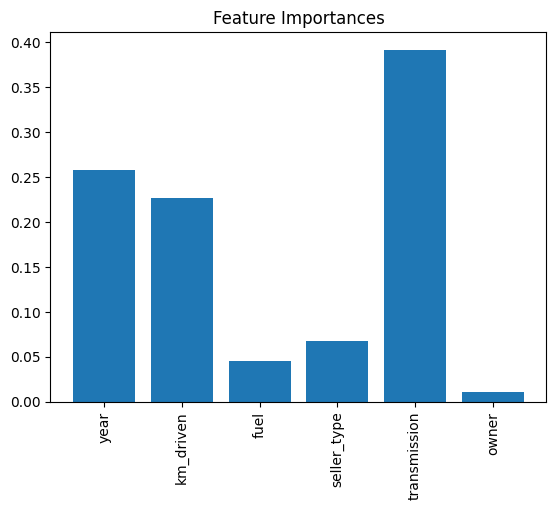

In [113]:
# Get feature importances from the model
importances = tree.feature_importances_
# Get feature names from the column names of X_train
feature_names = X_train.columns.tolist()
# Create a bar chart of feature importances
plt.bar(feature_names, importances)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

In [114]:
#Decision Tree Visualization
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns, 
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

Output hidden; open in https://colab.research.google.com to view.

# KNN Model Training

In [115]:
# Create the KNN model and fit on the imputed training data
knn = KNeighborsRegressor()
knn.fit(X_train_imputed, Y_train_imputed)

KNeighborsRegressor()

In [116]:
# Predict using the imputed testing data
y_pred_knn = knn.predict(X_test_imputed)

In [117]:
# Print the score of the model
print("K-Nearest Neighbors Regression:")
print("R-squared value: ", r2_score(Y_test_imputed, y_pred_knn))

K-Nearest Neighbors Regression:
R-squared value:  0.9834886474267401


Error Value

In [118]:
#Training Value
mse_knn_train = mean_squared_error(Y_train_imputed, knn.predict(X_train_imputed))
print("Mean Squared Error (MSE): ", mse_knn_train)
rmse_knn_train = np.sqrt(mse_knn_train)
print("Root Mean Squared Error (RMSE): ", rmse_knn_train)

Mean Squared Error (MSE):  14835897423.960678
Root Mean Squared Error (RMSE):  121802.69875483334


In [119]:
# Test Value
mse_knn = mean_squared_error(Y_test_imputed, y_pred_knn)
print("Mean Squared Error (MSE): ", mse_knn)
rmse_knn = np.sqrt(mse_knn)
print("Root Mean Squared Error (RMSE): ", rmse_knn)

Mean Squared Error (MSE):  16594645855.65838
Root Mean Squared Error (RMSE):  128820.207481817


Visualization of actual vs predicted PRice

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


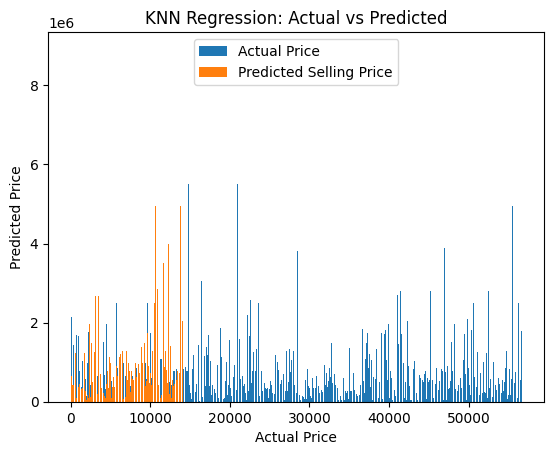

In [120]:
#Bar chart of actual and predicted values
fig, ax = plt.subplots()
ax.bar(range(len(Y_train_imputed)), Y_train_imputed, label='Actual Price')
ax.bar(range(len(y_pred_knn)), y_pred_knn, label='Predicted Selling Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('KNN Regression: Actual vs Predicted')
ax.legend()
plt.show()

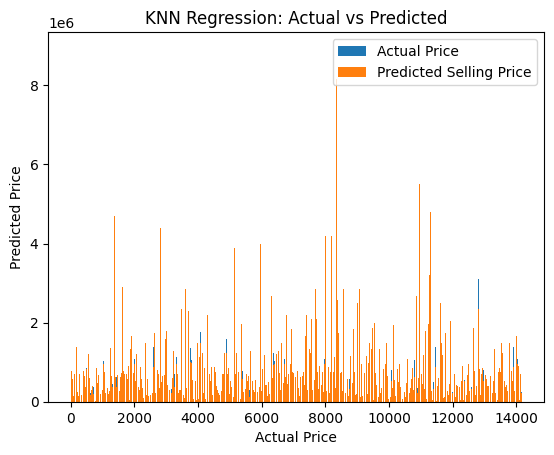

In [121]:
#Bar chart of actual and predicted values
fig, ax = plt.subplots()
ax.bar(range(len(Y_test_imputed)), Y_test_imputed, label='Actual Price')
ax.bar(range(len(y_pred_knn)), y_pred_knn, label='Predicted Selling Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
ax.set_title('KNN Regression: Actual vs Predicted')
ax.legend()
plt.show()

# SVM Model


In [122]:
# Create the SVM model and fit on the imputed training data
svm = SVR()
svm.fit(X_train_imputed, Y_train_imputed)

SVR()

In [123]:
# Predict using the imputed testing data
y_pred_svm = svm.predict(X_test_imputed)

In [124]:
# Print the score of the model
print("Support Vector Regression:")
print("R-squared value: ", r2_score(Y_test_imputed, y_pred_svm))

Support Vector Regression:
R-squared value:  -0.0770170343861023


MSE and RMSE values

In [125]:
# Train Value
mse_svm_train = mean_squared_error(Y_train_imputed, svm.predict(X_train_imputed))
print("Mean squared error (MSE): ", mse_svm_train)
rmse_svm_train = mean_squared_error(Y_train_imputed, svm.predict(X_train_imputed), squared=False)
print("Root mean squared error (RMSE): ", rmse_svm_train)

Mean squared error (MSE):  1079099413783.3932
Root mean squared error (RMSE):  1038797.0994296207


In [126]:
# Test Value
mse_svm = mean_squared_error(Y_test_imputed, y_pred_svm)
print("Mean squared error (MSE): ", mse_svm)
rmse_svm = mean_squared_error(Y_test_imputed, y_pred_svm, squared=False)
print("Root mean squared error (RMSE): ", rmse_svm)

Mean squared error (MSE):  1082450161902.1609
Root mean squared error (RMSE):  1040408.6513972098


Bar Chart using Histogram

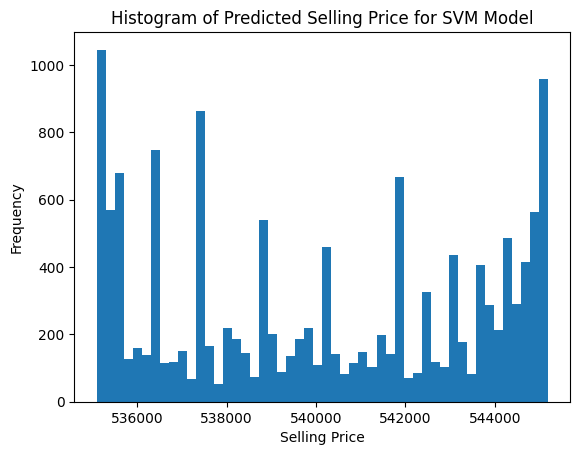

In [127]:
# Create a histogram of the residuals
plt.hist(y_pred_svm, bins=50)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Selling Price for SVM Model")
plt.show()


#By looking at the histogram, we can see how many predicted selling prices fall within each bin and get a sense of the overall distribution of predicted selling prices. T


# Linear Regression

In [128]:
# Create the linear regression model and fit on the imputed training data
lr = LinearRegression()
lr.fit(X_train_imputed, Y_train_imputed)

LinearRegression()

In [129]:
# Predict using the imputed testing data
y_pred_lr = lr.predict(X_test_imputed)

In [130]:
# Print the score of the model
print("Linear Regression:")
print("R-squared value: ", r2_score(Y_test_imputed, y_pred_lr))

Linear Regression:
R-squared value:  0.4853050345484957


Error Value

In [131]:
#Train Value
mse_lr_train = mean_squared_error(Y_train_imputed, lr.predict(X_train_imputed))
print("Mean Squared Error: ", mse_lr_train)
rmse_lr_train = np.sqrt(mse_lr_train)
print("Root Mean Squared Error: ", rmse_lr_train)

Mean Squared Error:  520821221358.2372
Root Mean Squared Error:  721679.4450157474


In [132]:
#Test Value
mse_lr = mean_squared_error(Y_test_imputed, y_pred_lr)
print("Mean Squared Error: ", mse_lr)
rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error: ", rmse_lr)

Mean Squared Error:  517291399203.1444
Root Mean Squared Error:  719229.726306654


Visulize of Actual Price against the Predicted Price

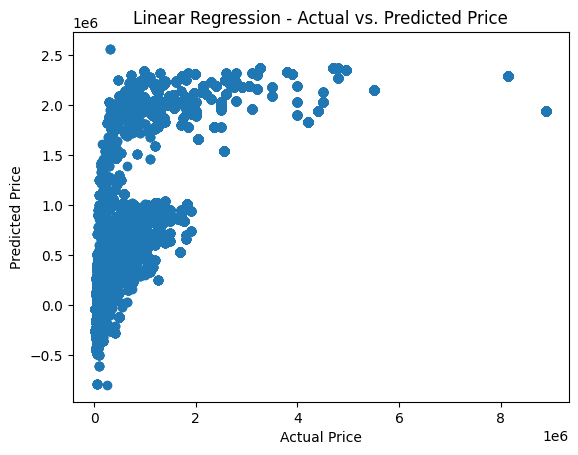

In [133]:
plt.scatter(Y_train_imputed, lr.predict(X_train_imputed))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Actual vs. Predicted Price")
plt.show()

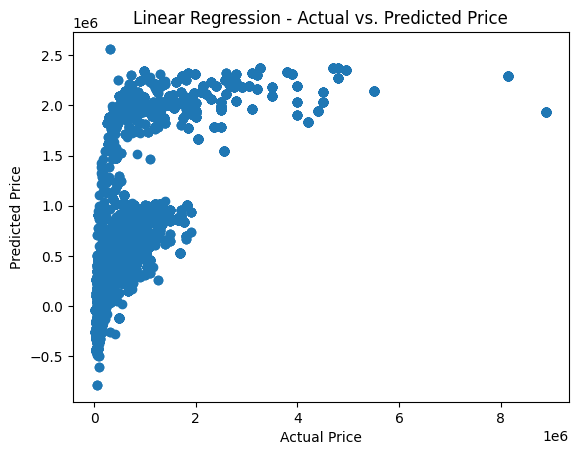

In [134]:
plt.scatter(Y_test_imputed, y_pred_lr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression - Actual vs. Predicted Price")
plt.show()

# Comparison of the Models

In [135]:
r2_values = []

# Append R-squared value for each model to the list
r2_values.append(('Linear Regression', r2_score(Y_test_imputed, y_pred_lr)))
r2_values.append(('Decision Tree', r2_score(Y_test, y_pred_tree)))
r2_values.append(('KNN', r2_score(Y_test, y_pred_knn)))
r2_values.append(('SVM', r2_score(Y_test, y_pred_svm)))

# Print R-squared values
print("R-squared values:")
for model, r2 in r2_values:
    print(model + ": " + str(r2))

R-squared values:
Linear Regression: 0.4853050345484957
Decision Tree: 0.9883354783880333
KNN: 0.9834886474267401
SVM: -0.0770170343861023


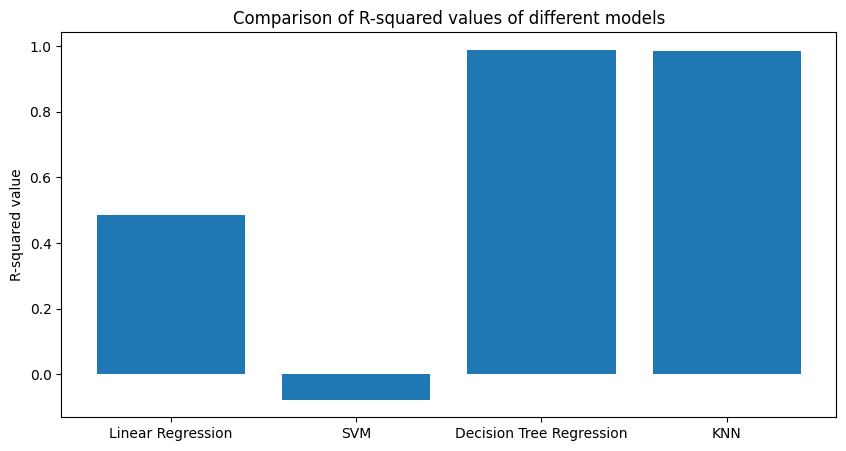

In [136]:
# Dictionary containing R-squared values of all the models
r_squared_values = {'Linear Regression': r2_score(Y_test_imputed, y_pred_lr),                    
                    'SVM': r2_score(Y_test_imputed, y_pred_svm),
                    'Decision Tree Regression': r2_score(Y_test_imputed, y_pred_tree),
                    'KNN': r2_score(Y_test_imputed, y_pred_knn)}

# Creating the bar chart
fig = plt.figure(figsize=(10, 5))

plt.bar(range(len(r_squared_values)), list(r_squared_values.values()), align='center')
plt.xticks(range(len(r_squared_values)), list(r_squared_values.keys()))
plt.ylabel('R-squared value')
plt.title('Comparison of R-squared values of different models')

plt.show()

In [137]:
# Create a dictionary to store the MSE and RMSE values for each model
mse_dict_train = {}
rmse_dict_train = {}




#  MSE and RMSE for SVM model

mse_dict_train['SVM'] = mse_svm_train
rmse_dict_train['SVM'] = rmse_svm_train



#  MSE and RMSE for linear regression model

mse_dict_train['Linear Regression'] = mse_lr_train
rmse_dict_train['Linear Regression'] = rmse_lr_train

#  MSE and RMSE for KNN model

mse_dict_train['KNN'] = mse_knn_train
rmse_dict_train['KNN'] = rmse_knn_train

# MSE and RMSE for decision tree model

mse_dict_train['Decision Tree'] = mse_tree_train
rmse_dict_train['Decision Tree'] = rmse_tree_train

# Convert the dictionaries to dataframes
mse_df_train = pd.DataFrame.from_dict(mse_dict_train, orient='index', columns=['MSE'])
rmse_df_train = pd.DataFrame.from_dict(rmse_dict_train, orient='index', columns=['RMSE'])

# Concatenate the dataframes horizontally
mse_rmse_df_train = pd.concat([mse_df_train, rmse_df_train], axis=1)

# Display the dataframe
print(mse_rmse_df_train)

                            MSE          RMSE
SVM                1.079099e+12  1.038797e+06
Linear Regression  5.208212e+11  7.216794e+05
KNN                1.483590e+10  1.218027e+05
Decision Tree      1.116553e+10  1.056671e+05


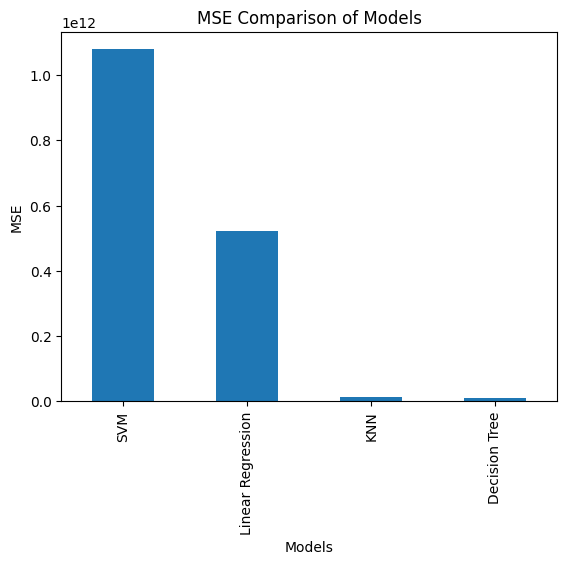

In [138]:
# Plot the MSE bar chart
mse_df_train.plot(kind='bar', y='MSE', legend=None)
plt.title('MSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

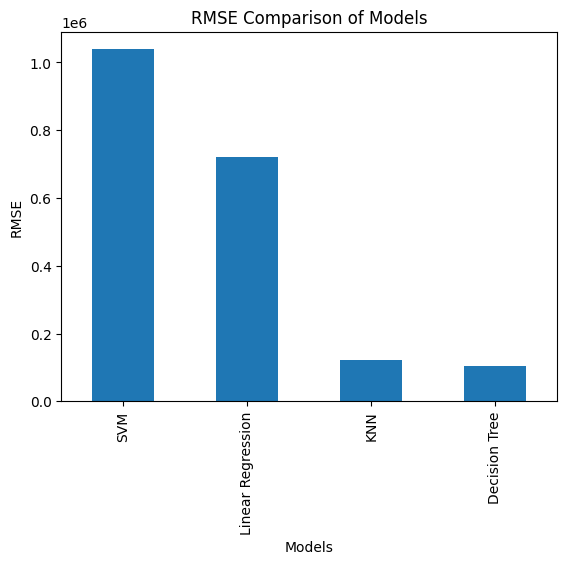

In [139]:
# Plot the RMSE bar chart
rmse_df_train.plot(kind='bar', y='RMSE', legend=None)
plt.title('RMSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

In [140]:
# Create a dictionary to store the MSE and RMSE values for each model
mse_dict = {}
rmse_dict = {}

#  MSE and RMSE for SVM model

mse_dict['SVM'] = mse_svm
rmse_dict['SVM'] = rmse_svm

#  MSE and RMSE for SVM model

mse_dict['KNN'] = mse_knn
rmse_dict['KNN'] = rmse_knn

#  MSE and RMSE for linear regression model

mse_dict['Linear Regression'] = mse_lr
rmse_dict['Linear Regression'] = rmse_lr

# MSE and RMSE for decision tree model

mse_dict['Decision Tree'] = mse_tree
rmse_dict['Decision Tree'] = rmse_tree

# Convert the dictionaries to dataframes
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index', columns=['MSE'])
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])

# Concatenate the dataframes horizontally
mse_rmse_df = pd.concat([mse_df, rmse_df], axis=1)

# Display the dataframe
print(mse_rmse_df)

                            MSE          RMSE
SVM                1.082450e+12  1.040409e+06
KNN                1.659465e+10  1.288202e+05
Linear Regression  5.172914e+11  7.192297e+05
Decision Tree      1.172336e+10  1.082745e+05


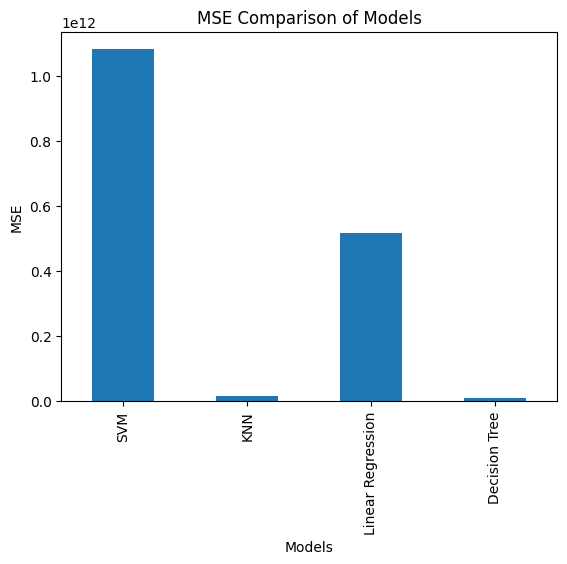

In [141]:
# Plot the MSE bar chart
mse_df.plot(kind='bar', y='MSE', legend=None)
plt.title('MSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()

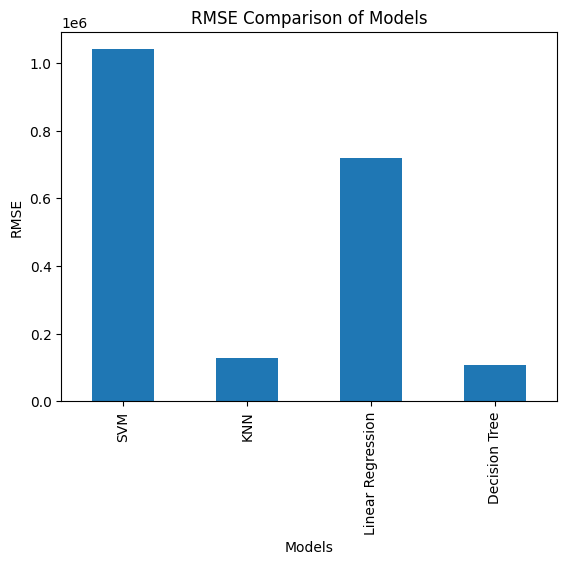

In [142]:
# Plot the RMSE bar chart
rmse_df.plot(kind='bar', y='RMSE', legend=None)
plt.title('RMSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Model Testing

In [143]:
random_instance = X_train.sample(n=1, random_state=1)

In [144]:
random_instance.head()

,year,km_driven,fuel,seller_type,transmission,owner
10579,2001.0,97000.0,0,1,0,3


In [145]:
# Linear regression 
y_pred_lr = lr.predict(random_instance)[0]
# Decision tree regression 
y_pred_tree = tree.predict(random_instance)[0]
# SVM
y_pred_svm = svm.predict(random_instance)[0]
# KNN 
y_pred_knn = knn.predict(random_instance)[0]

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [146]:
print("Linear Regression Selling Price: ", y_pred_lr)
print("Decision Tree Predicted Selling Price: ", y_pred_tree)
print("SVM Predicted Selling Price: ", y_pred_svm)
print("KNN Predicted Selling Price: ", y_pred_knn)

Linear Regression Selling Price:  -356037.97485104203
Decision Tree Predicted Selling Price:  93000.0
SVM Predicted Selling Price:  535262.2205185256
KNN Predicted Selling Price:  93000.0
